In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset_v1 = pd.read_csv('Automobile_insurance_fraud.csv')
dataset_v1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
dataset_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
dataset_v1.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Since, "_c39" contains only the null values for all the given records, hence, we can discard it

In [8]:
dataset_v1 = dataset_v1.drop(['_c39'], axis = 1)

In [43]:
dataset_v2 = dataset_v1.drop(['policy_number', 'policy_bind_date', 'insured_zip', 'incident_date','fraud_reported', 'incident_location'], 1)

num = dataset_v2.select_dtypes(include = np.number)
cat = dataset_v2.select_dtypes(exclude = np.number)

for column in cat:
        dataset_v2[column] = dataset_v2[column].replace(0, np.nan)

In [44]:
dataset_v2

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,2004
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,2007
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,?,87200,17440,8720,61040,Honda,Accord,2006
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,A5,1998


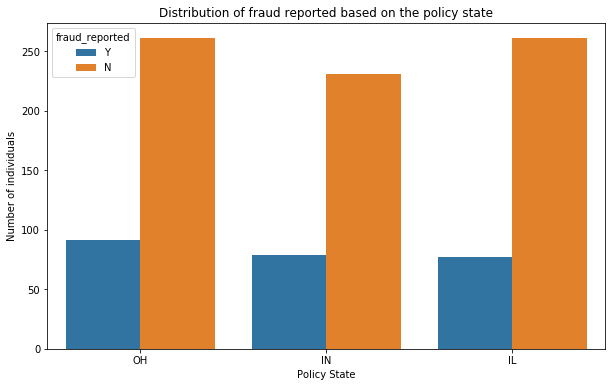

In [24]:
plt.figure(figsize=(10,6))
sns.countplot('policy_state', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported based on the policy state')
plt.xlabel('Policy State')
plt.ylabel('Number of individuals')
plt.show()

- OH state reported the highest number of fraud cases compared to "IN" and "IL"
- However, number of not reported cases seems to highest compared to other two

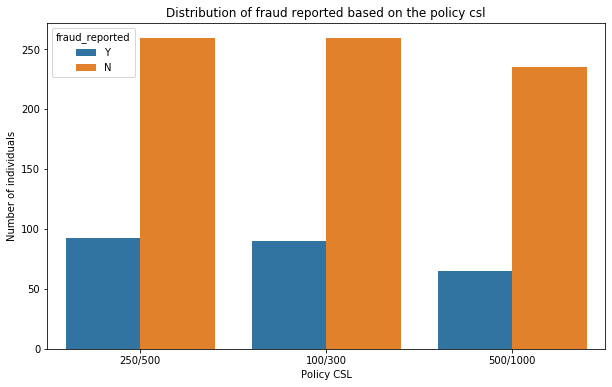

In [23]:
plt.figure(figsize=(10,6))
sns.countplot('policy_csl', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported based on the policy csl')
plt.xlabel('Policy CSL')
plt.ylabel('Number of individuals')
plt.show()

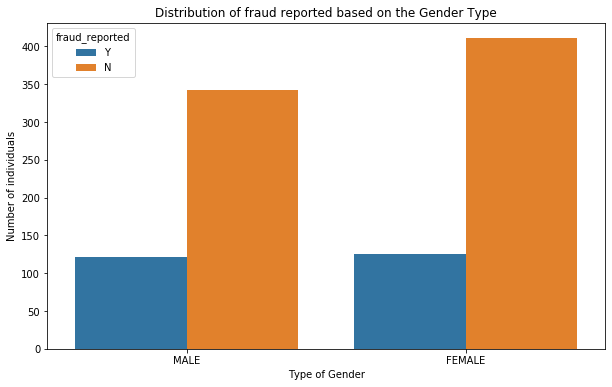

In [22]:
plt.figure(figsize=(10,6))
sns.countplot('insured_sex', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported based on the Gender Type')
plt.xlabel('Type of Gender')
plt.ylabel('Number of individuals')
plt.show()

- Reported cases seems to be approx. equal for both the gender
- While, in the case of non-reported cases, Female has higher individuals than Male

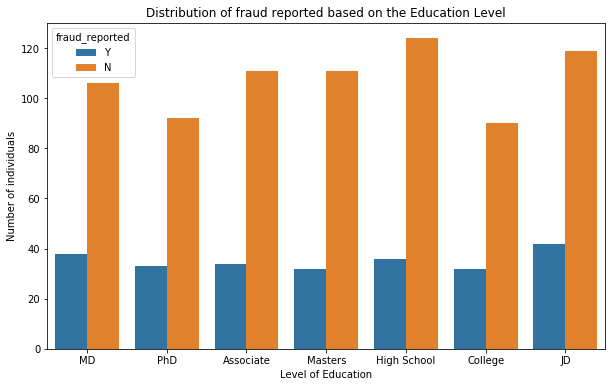

In [21]:
plt.figure(figsize=(10,6))
sns.countplot('insured_education_level', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported based on the Education Level')
plt.xlabel('Level of Education')
plt.ylabel('Number of individuals')
plt.show()

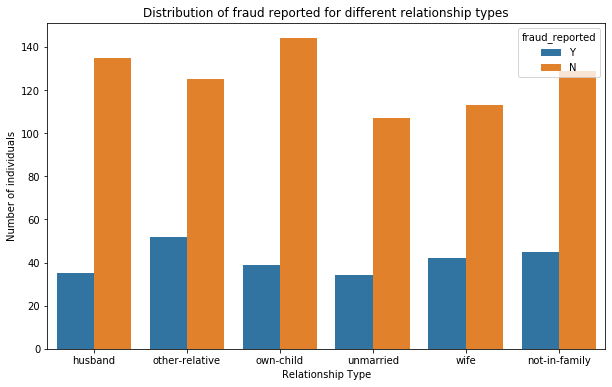

In [26]:
plt.figure(figsize=(10,6))
sns.countplot('insured_relationship', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported for different relationship types')
plt.xlabel('Relationship Type')
plt.ylabel('Number of individuals')
plt.show()

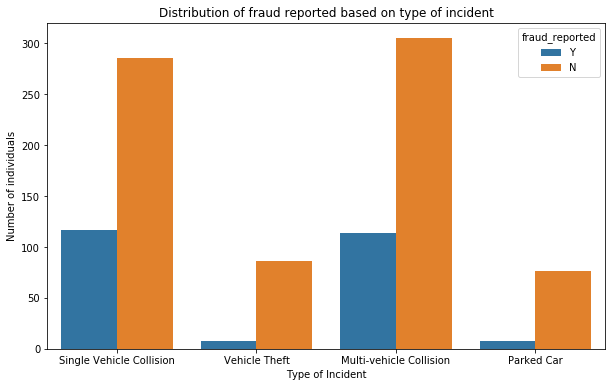

In [28]:
plt.figure(figsize=(10,6))
sns.countplot('incident_type', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported based on type of incident')
plt.xlabel('Type of Incident')
plt.ylabel('Number of individuals')
plt.show()

Reported cases are dominated by single and multi-vehicle collision

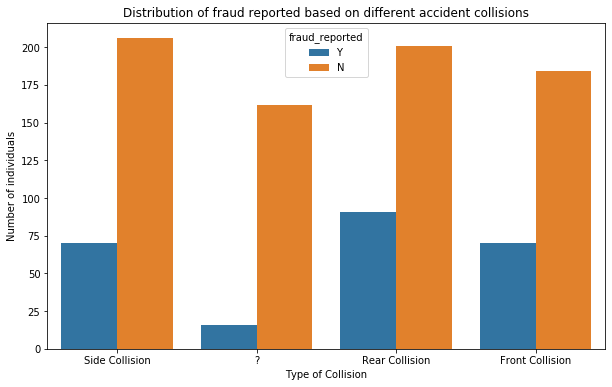

In [29]:
plt.figure(figsize=(10,6))
sns.countplot('collision_type', hue = 'fraud_reported', data = dataset_v1)
plt.title('Distribution of fraud reported based on different accident collisions')
plt.xlabel('Type of Collision')
plt.ylabel('Number of individuals')
plt.show()

In [31]:
dataset_v1['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

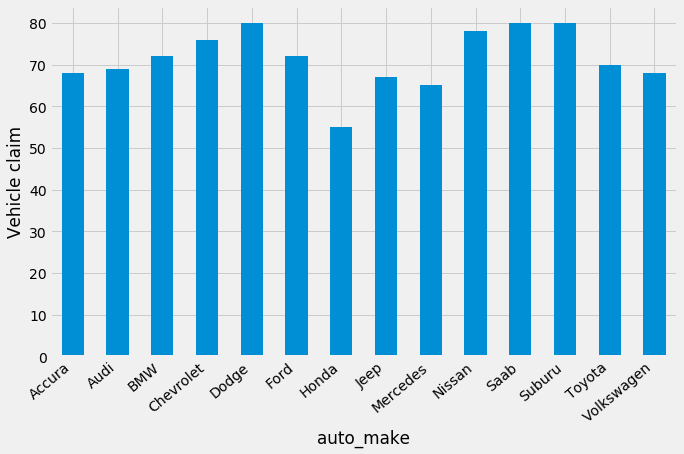

In [35]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(10,6))

ax= dataset_v1.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)

ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

Dodge, Saab and Suburu had the highest claims

In [36]:
# Converting the target variable to numeric datatype

dataset_v1['fraud_reported'].replace(to_replace = 'Y', value = 1, inplace = True)
dataset_v1['fraud_reported'].replace(to_replace = 'N',  value = 0, inplace = True)

dataset_v1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


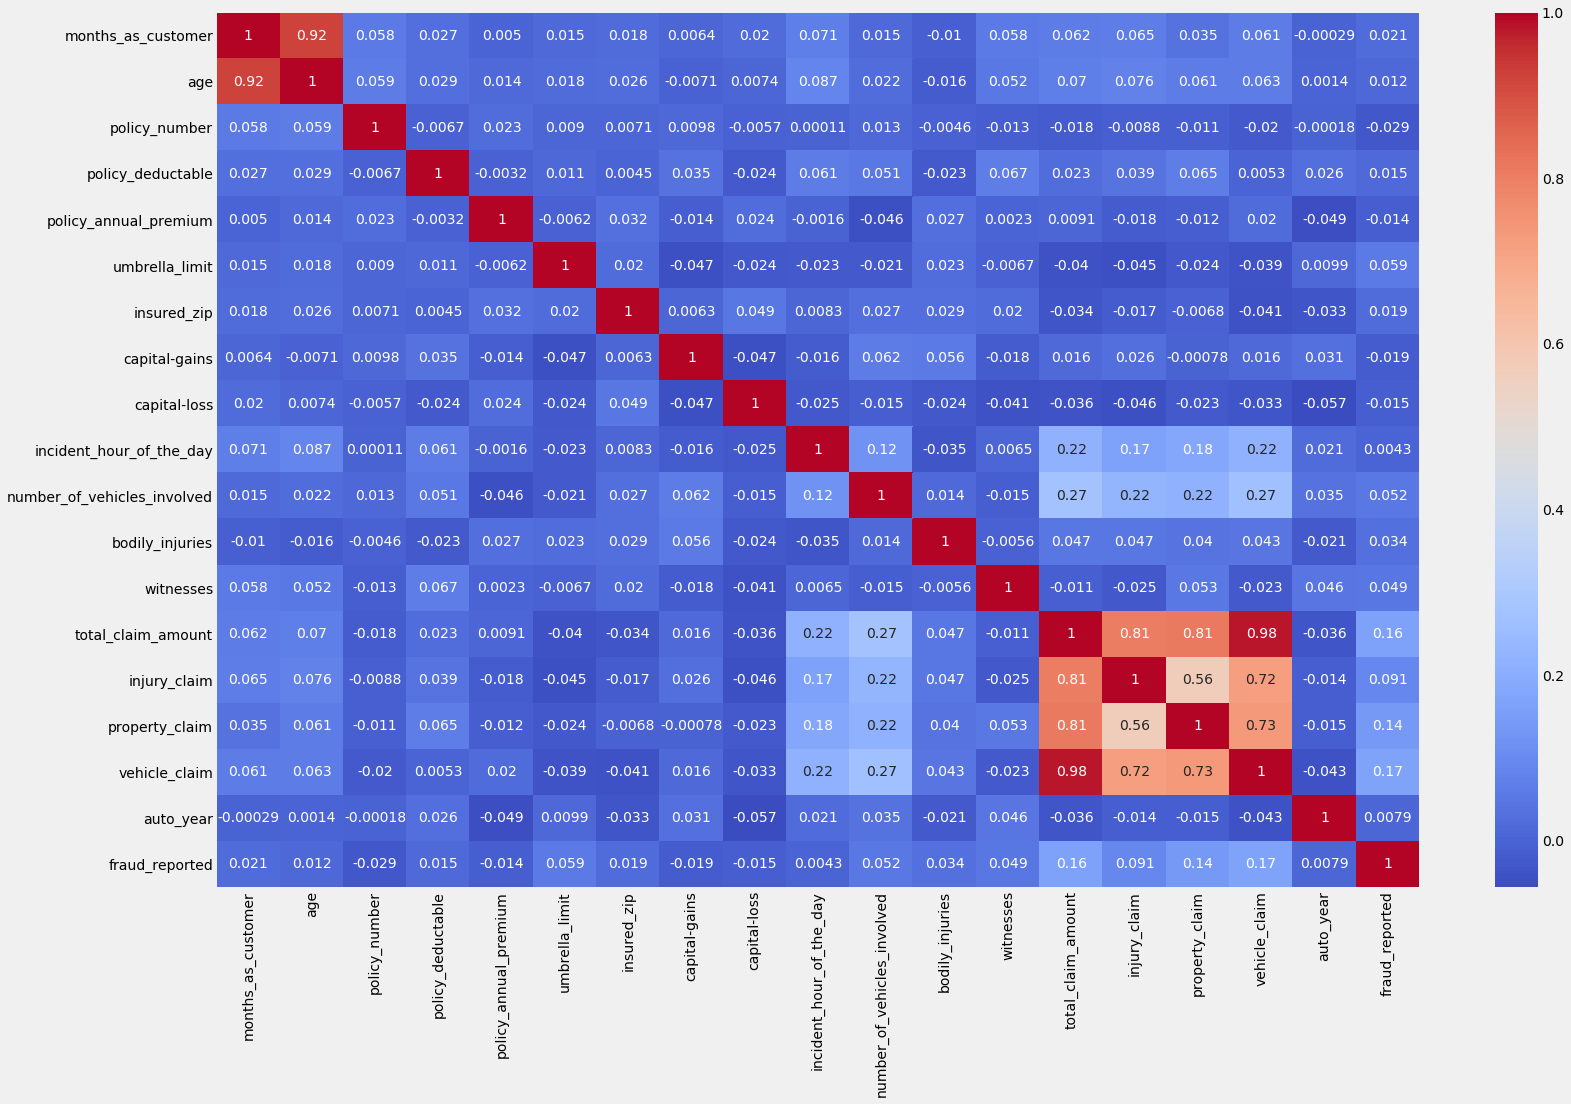

In [37]:
plt.figure(figsize=(24,15))
sns.heatmap(dataset_v1.corr(), annot=True, cmap='coolwarm')

From the above heatmap, 
- there is strong correlation between "total_claim_amount" and injury_claim, property_claim, vehicle_claim
- While, there is also some correlation of "injury_claim" with property_claim and vehicle_claim
- Vehicle_claim and property_claim also have high correlation